In [4]:
!pip install scipy
!pip install scikit-learn

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/boston_housing.csv")

# Check for missing values
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Skewness of 'rm': 0.40361213328874385


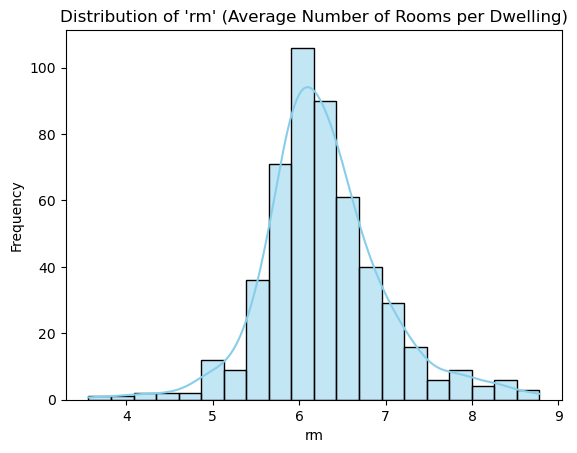

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate skewness for the 'rm' feature
rm_skewness = df['rm'].skew()

# Display the skewness value
print(f"Skewness of 'rm': {rm_skewness}")

# Plot the distribution of the 'rm' feature
sns.histplot(df['rm'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of 'rm' (Average Number of Rooms per Dwelling)")
plt.xlabel('rm')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Impute missing values in 'rm' column with the median
df['rm'] = df['rm'].fillna(df['rm'].median())

# Verify that missing values are handled
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [5]:
import numpy as np

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df < lower_bound) | (df > upper_bound)
print(outliers.sum())  # Count of outliers per column

crim       66
zn         68
indus       0
chas       35
nox         0
rm         30
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64


In [6]:
# Apply square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed = np.sqrt(df_sqrt_transformed)

# Check the transformed data
print(df_sqrt_transformed.head())

       crim        zn     indus  chas       nox        rm       age       dis  \
0  0.079498  4.242641  1.519868   0.0  0.733485  2.564176  8.074652  2.022375   
1  0.165257  0.000000  2.658947   0.0  0.684836  2.533969  8.882567  2.228699   
2  0.165197  0.000000  2.658947   0.0  0.684836  2.680485  7.816649  2.228699   
3  0.179917  0.000000  1.476482   0.0  0.676757  2.645373  6.767570  2.462154   
4  0.262774  0.000000  1.476482   0.0  0.676757  2.673387  7.362065  2.462154   

        rad        tax   ptratio          b     lstat      medv  
0  1.000000  17.204651  3.911521  19.922349  2.231591  4.898979  
1  1.414214  15.556349  4.219005  19.922349  3.023243  4.647580  
2  1.414214  15.556349  4.219005  19.819939  2.007486  5.890671  
3  1.732051  14.899664  4.324350  19.865296  1.714643  5.779273  
4  1.732051  14.899664  4.324350  19.922349  2.308679  6.016644  


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/boston_housing.csv')

# Strip spaces in column names, if any
df.columns = df.columns.str.strip()

# One-Hot Encode the 'chas' column
df = pd.get_dummies(df, columns=['chas'], drop_first=True)

# Check the first few rows to verify the transformation
print(df.head())

      crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  chas_1  
0  396.90   4.98  24.0   False  
1  396.90   9.14  21.6   False  
2  392.83   4.03  34.7   False  
3  394.63   2.94  33.4   False  
4  396.90   5.33  36.2   False  


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('../data/boston_housing.csv')

# Strip spaces from column names (if any)
df.columns = df.columns.str.strip()

# One-Hot Encode the 'chas' column
df = pd.get_dummies(df, columns=['chas'], drop_first=True)

# Define the list of numerical features (excluding target variable 'medv')
num_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[num_features] = scaler.fit_transform(df[num_features])

# Check the transformed dataset
print(df.head())


       crim        zn     indus       nox        rm       age       dis  \
0 -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   

        rad       tax   ptratio         b     lstat  medv  chas_1  
0 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  24.0   False  
1 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  21.6   False  
2 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  34.7   False  
3 -0.752922 -1.106115  0.113032  0.416163 -1.361517  33.4   False  
4 -0.752922 -1.106115  0.113032  0.441052 -1.026501  36.2   False  


In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['medv', 'chas_1'])  # Features (exclude 'medv' and the 'chas_1' target column)
y = df['medv']  # Target variable (housing prices)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dimensions of the split data
print("Training set X shape:", X_train.shape)
print("Testing set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Testing set y shape:", y_test.shape)

Training set X shape: (404, 12)
Testing set X shape: (102, 12)
Training set y shape: (404,)
Testing set y shape: (102,)
